# Maze generator

In [3]:
import numpy as np
import matplotlib.pyplot as plt

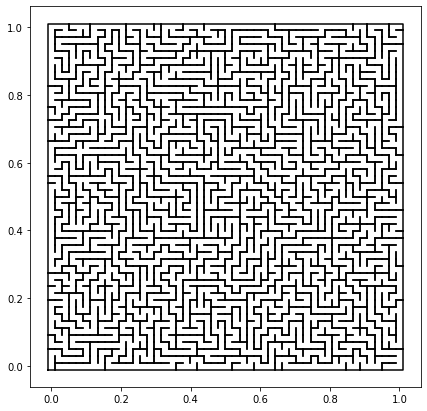

In [83]:
class Maze:
    def __init__(self, n=3):
        self.gdict = {} # Main graph
        self.n = n
        self.randperm_resource = np.random.permutation(n+1).tolist()
        for i in range(n):
            for j in range(n):
                self.gdict[(i,j)] = []
        self.trail((0,0))
                    
    def neighbors(self, pair):
        """Returns legal neighboring pairs for each pair (tuple)."""
        i,j = pair
        n = self.n
        out = []
        if i>0:   out.append((i-1,j))
        if i<n-1: out.append((i+1,j))
        if j>0:   out.append((i,j-1))
        if j<n-1: out.append((i,j+1))
        return out
    
    def gplot(self):
        """Plots underlying graph (not the maze how we typically draw them)."""
        x = np.linspace(0,1,self.n)
        for key,val in self.gdict.items():
            i1,j1 = key
            for i,j in val:
                plt.plot(x[[i1,i]], x[[j1,j]], 'b-')
                
    def plot(self):
        """Draws the maze."""
        x = np.linspace(0,1,self.n)
        pad = 1/(self.n-1)/2
        plt.plot(np.array([0, 0, 1, 1, 0])*(1+2*pad)-pad, np.array([0, 1, 1, 0, 0])*(1+2*pad)-pad, 'k-')
        for key,val in self.gdict.items():
            i1,j1 = key
            for i,j in self.neighbors(key):
                if (i,j) not in val:
                    plt.plot([(x[i1]+x[i]-x[j1]+x[j])/2, (x[i1]+x[i]+x[j1]-x[j])/2],
                             [(x[j1]+x[j]-x[i1]+x[i])/2, (x[j1]+x[j]+x[i1]-x[i])/2], 'k-')
                    
    def randperm(self,point,l):
        """A rather unsuccessful attempt to pre-calculate some randomness. 
        It's both still slow, and not random enough."""
        n = len(self.randperm_resource)
        left = (point[0]+point[1]*61) % n
        if left+l < n:
            out =  self.randperm_resource[left:left+l]
        out = self.randperm_resource[left:] + self.randperm_resource[:l-(n-left)]
        return [i for _,i in sorted([(out[j],j) for j in range(l)])]
                
    def trail(self, point, visited=None):
        """Making the actual maze, recursively."""
        if visited is None:
            visited = {key:False for key,_ in self.gdict.items()}
        visited[point] = True
        nei = self.neighbors(point)
        if True:
            nei = [nei[i] for i in np.random.permutation(len(nei))] 
            # Slowest part of the entire script (30% of time)
        else:
            # Rather unsuccessful attempt to front-order randomness
            nei = [nei[i] for i in self.randperm(point,len(nei))] # Faster?
        while nei:
            p = nei.pop()
            if not visited[p]:
                self.gdict[point].append(p)
                self.gdict[p].append(point)
                self.trail(p, visited)
        return
                
#%prun 
maze = Maze(50) # Doesn't work with n=100 (recursion depth error)
fig = plt.figure(figsize=(7,7))
maze.plot()
#maze.gplot() # paths